## Python Project - Marvel Mart Project
## Amanda Dang
## March 13, 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Part 1: Cleaning the Data

In [2]:
# this creates a dataframe for us to read the csv file.
salesDF = pd.read_csv ('MMDataSamples/MM_Sales.csv')

In [3]:
salesDF

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/15,897751939,10/12/15,3604,668.270,502.540,2408445.080,1811154.160,597290.920
1,Europe,Iceland,Baby Food,Offline,L,11/20/10,599480426,1/9/11,8435,255.280,159.420,2153286.800,1344707.700,808579.100
2,Europe,Russia,Meat,Online,L,6/22/17,538911855,6/25/17,4848,421.890,364.690,2045322.720,1768017.120,277305.600
3,Europe,Moldova,Meat,Online,L,2/28/12,459845054,3/20/12,7225,421.890,364.690,3048155.250,2634885.250,413270.000
4,Europe,Malta,Cereal,Online,H,8/12/10,626391351,9/13/10,1975,205.700,117.110,406257.500,231292.250,174965.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Central America and the Caribbean,Dominican Republic,Baby Food,Online,L,2/12/15,350891578,3/15/15,5470,255.280,159.420,1396381.600,872027.400,524354.200
49996,Central America and the Caribbean,Cuba,Office Supplies,Online,H,3/28/13,748260629,5/3/13,5803,651.210,524.960,3778971.630,3046342.880,732628.750
49997,Asia,Vietnam,Personal Care,Online,M,11/11/16,322932231,12/18/16,1678,81.730,56.670,137142.940,95092.260,42050.680
49998,Sub-Saharan Africa,Sierra Leone,Clothes,Offline,M,8/28/10,492142713,9/21/10,4820,109.280,35.840,526729.600,172748.800,353980.800


In [4]:
# this shows us the data type for each of the columns.
salesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          50000 non-null  object 
 1   Country         50000 non-null  object 
 2   Item Type       49994 non-null  object 
 3   Sales Channel   50000 non-null  object 
 4   Order Priority  49985 non-null  object 
 5   Order Date      50000 non-null  object 
 6   Order ID        50000 non-null  object 
 7   Ship Date       50000 non-null  object 
 8   Units Sold      50000 non-null  int64  
 9   Unit Price      50000 non-null  float64
 10  Unit Cost       50000 non-null  float64
 11  Total Revenue   50000 non-null  float64
 12  Total Cost      50000 non-null  float64
 13  Total Profit    50000 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 5.3+ MB


In [5]:
# this creates a copy of the csv file so that we can save the cleaned data into it.
cleanSales = salesDF.copy()

In [6]:
# this checks for all the missing data in each of the individual columns in the csv file.
sumNA = salesDF.isna().sum()
print(sumNA)

Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64


In [7]:
# this cleans the Country column. It tries to convert each Country to a float, and if it runs, then it needs
# to be cleaned. If any of the rows have a number, it will be replaced with "NULL".
count = 0

print ("Testing for erroneous data in Country:")
for index, row in cleanSales.iterrows():
    try:
        row.loc['Country']= float(row.loc['Country'])
        cleanSales.loc[int(index),'Country'] = 'NULL'
        print(cleanSales.loc[int(index), 'Country'])
        count += 1
    except: 
        1 == 1

print(f"Number of erroneous Country data: {count}")

Testing for erroneous data in Country:
NULL
NULL
NULL
Number of erroneous Country data: 3


In [8]:
# this cleans the Item Type. There are 6 rows without data, so we need to remove them. This replaces the 
# missing data in the column with "NULL".
cleanSales['Item Type'].fillna("NULL", inplace=True)

In [9]:
# this cleans the Order Priority. There are 6 rows without data, so we need to remove them. This replaces the 
# missing data in the column with "NULL".
cleanSales['Order Priority'].fillna("NULL", inplace=True)

In [10]:
# this cleans the Country column. It tries to convert each Order ID to a float, and if it fails, then it is a 
# string. If any of the rows aren't a number, it will be replaced with 0. 
count = 0

print ("Testing for erroneous data in Order ID:")
for index, row in cleanSales.iterrows():
    try:
        row.loc['Order ID'] = float(row.loc['Order ID'])
    except:
        print(row.loc['Order ID'])
        cleanSales.loc[int(index),'Order ID'] = 0
        count += 1
        
print (f"Number of erroneous Order ID data: {count}")

Testing for erroneous data in Order ID:
Cosmetics
Fruits
Snacks
Meat
Snacks
Number of erroneous Order ID data: 5


In [56]:
# this replaces the spaces with an underscore in the column names.
cleanSales.columns = [c.replace(' ', '_') for c in cleanSales.columns]

In [57]:
# this saves only the rows in the Country, Item Type, Order Priority, and Order ID columns that aren't NULL
# or 0.
cleanSales = cleanSales[cleanSales.Country !="NULL"]
cleanSales = cleanSales[cleanSales.Item_Type != "NULL"]
cleanSales = cleanSales[cleanSales.Order_Priority != "NULL"]
cleanSales = cleanSales[cleanSales.Order_ID != 0]

In [58]:
# this checks that the missing or incorrect data have been cleaned.
print(cleanSales['Country'][cleanSales['Country']=='NULL'].count())
print(cleanSales['Item_Type'][cleanSales['Item_Type']=='NULL'].count())
print(cleanSales['Order_Priority'][cleanSales['Order_Priority']=='NULL'].count())
print(cleanSales['Order_ID'][cleanSales['Order_ID']==0].count())

0
0
0
0


In [59]:
# this saves the cleaned data to a new csv file.
cleanSales.to_csv('MMDataSamples/MM_Sales_clean.csv')

Part 2: Exploratory Data Analysis with Reports & Visualizations

    1. Country Rankings

Top 10 Countries with the Most Amount of Sales:

Country
Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          314
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
South Sudan                         302
Name: Order_ID, dtype: int64


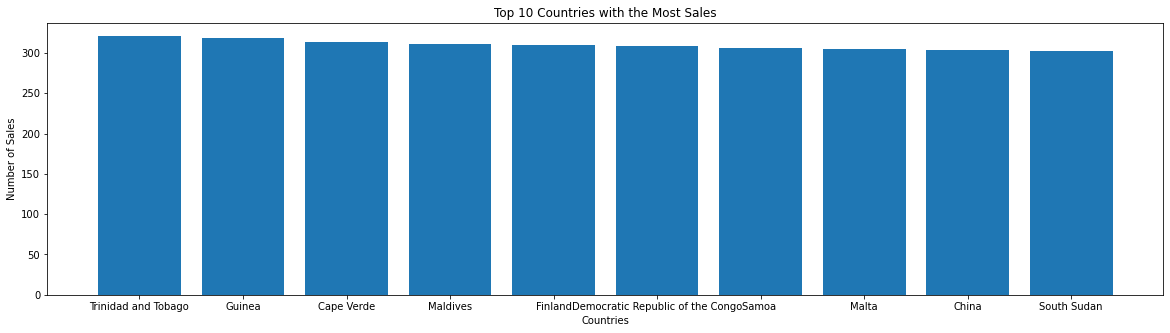

In [13]:
# this imports our cleaned data. It then uses the group by, count, and nlargest commands to return the top 10
# countries that have the most sales. Finally, it creates a bar chart to visualize this.
MMsales = pd.read_csv ('MMDataSamples/MM_Sales_clean.csv')

sales1 = MMsales.groupby(['Country']).count()['Order_ID'].nlargest(10)
print ("Top 10 Countries with the Most Amount of Sales:\n")
print (sales1)

plt.figure(figsize=(20, 5))
plt.bar(sales1.index, sales1.values)
plt.title('Top 10 Countries with the Most Sales')
plt.xlabel('Countries')
plt.ylabel('Number of Sales')
plt.show()

In [18]:
# this opens the txt file as a writer so that we can create the function "AddtoMM_Ranking" and append
# the information that we found previously to that file.
with open ("MMDataSamples/Marvel_Mart_Rankings.txt", "a+") as writer:
    writer.write ("MM Rankings\n")

def AddtoMM_Ranking(info):
    with open("MMDataSamples/Marvel_Mart_Rankings.txt", "a+") as writer:
        writer.write("\n")
        writer.write(info)

top10 = "Countries Most Sale Transactions \nTrinidad and Tobago: 321 \nGuinea: 318 \nCape Verde: 314 \nMaldives: 311 \nFinland: 310 \nDemocratic Republic of the Congo: 308 \nSamoa: 306 \nMalta: 305 \nChina: 303 \nSouth Sudan: 302\n"
AddtoMM_Ranking(top10)
top10answer = "The country we should build a shipping center in is Cape Verde, because it is ranked third in countries with the most amount of sales, and the only country in the top three selling countries without a shipping center.\n"
AddtoMM_Ranking(top10answer)

    2. Count of Sales Channels & Order Priorities

In [14]:
# this uses the value count command to find the count of distinct values in the Sales Channel column.
channelType = MMsales['Sales_Channel'].value_counts()
print(channelType)

Online     30183
Offline    19788
Name: Sales_Channel, dtype: int64


In [15]:
# this uses the value count command to find the count of the distinct values in the Order Priority column.
priorityType = MMsales['Order_Priority'].value_counts()
print(priorityType)

M    19881
H    15094
L     9984
C     5012
Name: Order_Priority, dtype: int64


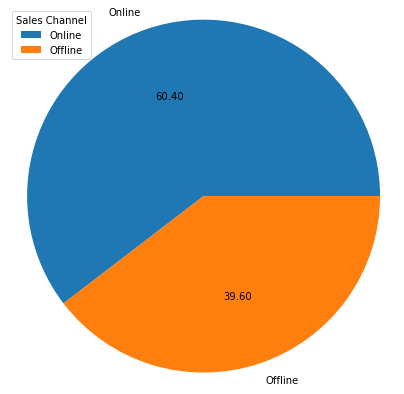

In [66]:
# this creates a pie chart with the information that we previously found.
plt.figure(figsize=(7,7))
plt.pie(channelType, labels=channelType.index, shadow=False, autopct='%.2f')
plt.axis('equal') 
plt.legend(loc=2, title='Sales Channel')
plt.show()

In [19]:
# this uses the function "AddtoMM_Ranking" to append the Sales Channel information to the txt file. It then does
# the same with the Order Priority information.
channelTypes1 = "Sales Channels: \nOnline: 30183 \nOffline: 19788 \nWe do more online sales.\n"
AddtoMM_Ranking(channelTypes1)

priorityTypes1 = "Order Priorities: \nL: 9984 \nM: 19881 \nH: 15094 \nC: 5012 \nWe do more M order priorities.\n"
AddtoMM_Ranking(priorityTypes1)

    3. Profits by Item Type

C:\Users\amand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


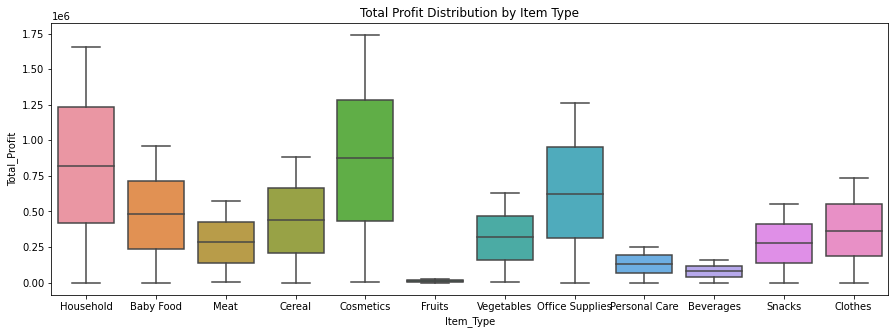

In [68]:
# this creates a boxplot to show the Total Profit Distribution by Item Type.
plt.figure(figsize=(15, 5))
plt.title ("Total Profit Distribution by Item Type")
ax = sns.boxplot(MMsales.Item_Type, MMsales.Total_Profit)

In [87]:
# this uses the group by and sum function to find the sum of the Total Profit by each Item Type.
itemType = MMsales.groupby(['Item_Type']).sum()['Total_Profit']
print("Sum of Total Profit by Item Type:")
print(itemType)

Sum of Total Profit by Item Type:
Item_Type
Baby Food         1942865748.120
Beverages          327559249.080
Cereal            1824726412.290
Clothes           1520832019.680
Cosmetics         3638407966.750
Fruits              51010570.920
Household         3401180998.060
Meat              1196342404.400
Office Supplies   2605440187.500
Personal Care      535250525.600
Snacks            1149715758.720
Vegetables        1322639660.240
Name: Total_Profit, dtype: float64


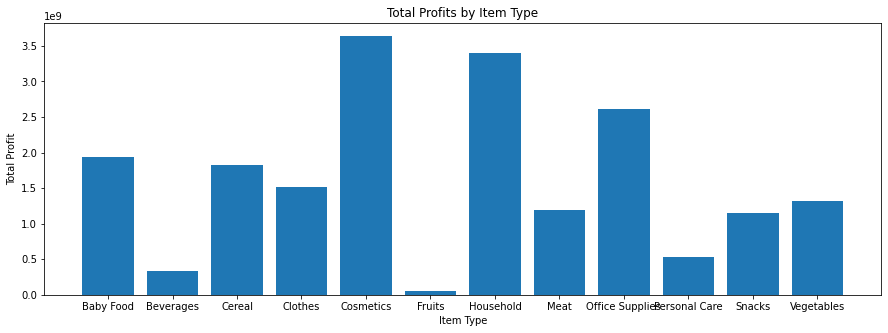

In [88]:
# this creates a bar chart with the sums of the different Total Profits by Item Type.
plt.figure(figsize=(15, 5))
plt.bar(itemType.index, itemType.values)
plt.title('Total Profits by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.show()

In [89]:
# this uses the group by, sum, and nlargest command to return the top 3 Item Types that have the highest sum of
# Total Profit.
itemType1 = MMsales.groupby(['Item_Type']).sum()['Total_Profit'].nlargest(3)
print("Top 3 Item Types We Brought in the Most Profit:")
print(itemType1)

Top 3 Item Types We Brought in the Most Profit:
Item_Type
Cosmetics         3638407966.750
Household         3401180998.060
Office Supplies   2605440187.500
Name: Total_Profit, dtype: float64


In [20]:
# this uses the function "AddtoMM_Ranking" to add the Item Type information to the txt file.
itemTypes2 = "Highest Selling Items: \nCosmetics: 3638407966.750 \nHousehold: 3401180998.060 \nOffice Supplies: 2605440187.500 \nWe profitted from Cosmetics the most.\n"
AddtoMM_Ranking(itemTypes2)

Taking a look at the boxplots that we created for the Total Profit Distribution by Item Types, we can see where the minimums, first quartiles, medians, third quartiles, and maximums fall. While Cosmetics has the highest maximum, third quartile, and first quartile, Fruits has a loweer Total Profits. From this, we are able to analyze that Cosmetics is most profitable for us and Fruits is the least. Because of this, we may want to consider focusing more of our marketing initiatives to increase the sales of Fruits. This may include doing more promotions/sales on those items so that more people are drawn into to buy them. However, if they are still unsuccessful after those initiatives, we may need to consider increasing the inventory of Cosmetics and other successful items, such as Household and Office Supplies, and cutting the inventory of Fruits and other less successful items, such as Beverages, and Personal Care.

    4. Descriptive Statistics

In [73]:
# this uses the sum command to return the sum of the following columns. It then prints the following statements.
unitsSold = MMsales['Units_Sold']
unitCost = MMsales['Unit_Cost']
totalRev = MMsales['Total_Revenue']
totalCost = MMsales['Total_Cost']
totalProfit = MMsales['Total_Profit']

print ("Sums:")
print(f"Units Sold: {unitsSold.sum()}")
print(f"Unit Cost: {unitCost.sum()}")
print(f"Total Revenue: {totalRev.sum()}")
print(f"Total Cost: {totalCost.sum()}")
print(f"Total Profit: {totalProfit.sum()}")

Sums:
Units Sold: 249818150
Unit Cost: 9360768.320000002
Total Revenue: 66145004417.17
Total Cost: 46629032915.81
Total Profit: 19515971501.36


In [74]:
# this uses the mean command to return the averages of the following columns in the following statements. 
print ("Averages:")
print(f"Average Units Sold: {unitsSold.mean()}")
print(f"Average Unit Cost: {unitCost.mean()}")
print(f"Average Revenue: {totalRev.mean()}")
print(f"Average Cost: {totalCost.mean()}")
print(f"Average Profit: {totalProfit.mean()}")

Averages:
Average Units Sold: 4999.262572291929
Average Unit Cost: 187.32401432829784
Average Revenue: 1323667.8156764843
Average Cost: 933121.8690002197
Average Profit: 390545.94667627424


In [75]:
# this uses the max command to return the maximums of the following columns in the following statements. 
print ("Maxes:")
print(f"Max Units Sold: {unitsSold.max()}")
print(f"Max Unit Cost: {unitCost.max()}")
print(f"Max Total Revenue: {totalRev.max()}")
print(f"Max Total Cost: {totalCost.max()}")
print(f"Max Total Profit: {totalProfit.max()}")

Maxes:
Max Units Sold: 10000
Max Unit Cost: 524.96
Max Total Revenue: 6682031.73
Max Total Cost: 5249075.04
Max Total Profit: 1738178.39


In [76]:
# this creates a dataframe with the sums, averages, and maximums that we previously calculated for each of the
# columns.
stats1 = {"Sums": [249818150, 9360768.320000002, 66145004417.17, 46629032915.81, 19515971501.36],
        "Averages": [4999.262572291929, 187.32401432829784, 1323667.8156764843, 933121.8690002197, 390545.94667627424],
        "Maxes": [10000, 524.96, 6682031.73, 5249075.04, 1738178.39]}

statsDF = pd.DataFrame(stats1, index=['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'])

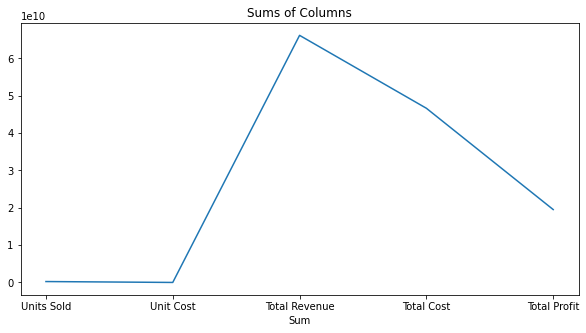

In [77]:
# this creates a line chart with the sums of each of the columns that we previously found.
plt.figure(figsize=(10, 5))
plt.plot(statsDF.index, statsDF.Sums)
plt.xlabel('Sum')
plt.title ("Sums of Columns")
plt.show()

<AxesSubplot:>

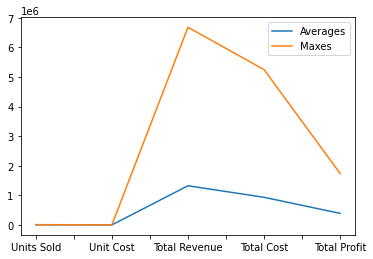

In [78]:
# this creates a line chart with the averages and maximums of each of the columns that we previously found.
statsDF.iloc[:,1:].plot()

In [24]:
# this opens up our txt file as a writer so that we can create the function "AddtoMM_Calc". It then appends the
# information that we previously found about the sums, averages, and maximums to the txt file.
with open ("MMDataSamples/Marvel_Mart_Calc.txt", "a+") as writer:
    writer.write ("MM Calculations\n")
def AddtoMM_Calc(info):
    with open("MMDataSamples/Marvel_Mart_Calc.txt", "a+") as writer:
        writer.write("\n")
        writer.write(info)

sums = ("Sums: \nUnits Sold: 249818150 \nUnit Cost: 9360768.320000002 \nTotal Revenue: 66145004417.17 \nTotal Cost: 46629032915.81 \nTotal Profit: 19515971501.36\n")
avgs = ("Averages: \nUnits Sold: 4999.262572291929 \nUnit Cost: 187.32401432829784 \nTotal Revenue: 1323667.8156764843 \nTotal Cost: 933121.8690002197 \nTotal Profit: 390545.94667627424\n")
maxs = ("Maxes: \nUnits Sold: 10000 \nUnit Cost: 524.96 \nTotal Revenue: 6682031.73 \nTotal Cost: 5249075.04 \nTotal Profit: 1738178.39\n")

AddtoMM_Calc(sums)
AddtoMM_Calc(avgs)
AddtoMM_Calc(maxs)

Part 3: Cross-Reference Statistics

In [23]:
# this creates a list of the Regions we sell to by using the group by and count command.
regions = MMsales.groupby(['Region']).count()['Country']
print("List of Regions We Sell To:")
print(regions)

List of Regions We Sell To:
Region
Asia                                  7346
Australia and Oceania                 4016
Central America and the Caribbean     5446
Europe                               12836
Middle East and North Africa          6119
North America                         1099
Sub-Saharan Africa                   13109
Name: Country, dtype: int64


In [82]:
# this creates an empty list for each of the Regions. It then uses the for loop to go through each of the rows 
# in the csv file to check if the row matches the region we are testing for. After, it checks to see if the
# Country is not in the corresponding list so that only distinct values are being appended. Once that is 
# complete, it creates a dictionary with the key as the Regions and the values as the lists we created.
asia = []
ao = []
ca = []
europe = []
mena = []
namerica = []
ssafrica = []

for index, row in MMsales.iterrows():
    if row.loc['Region'] == 'Asia' and row.loc['Country'] not in asia:
        asia.append(row.loc['Country'])

for index, row in MMsales.iterrows():
    if row.loc['Region'] == 'Australia and Oceania' and row.loc['Country'] not in ao:
        ao.append(row.loc['Country'])
        
for index, row in MMsales.iterrows():
    if row.loc['Region'] == 'Central America and the Caribbean' and row.loc['Country'] not in ca:
        ca.append(row.loc['Country'])

for index, row in MMsales.iterrows():
    if row.loc['Region'] == 'Europe' and row.loc['Country'] not in europe:
        europe.append(row.loc['Country'])
        
for index, row in MMsales.iterrows():
    if row.loc['Region'] == 'Middle East and North Africa' and row.loc['Country'] not in mena:
        mena.append(row.loc['Country'])

for index, row in MMsales.iterrows():
    if row.loc['Region'] == 'North America' and row.loc['Country'] not in namerica:
        namerica.append(row.loc['Country'])

for index, row in MMsales.iterrows():
    if row.loc['Region'] == 'Sub-Saharan Africa' and row.loc['Country'] not in ssafrica:
        ssafrica.append(row.loc['Country'])

regionsDict = {"Asia": asia, "Australia and Oceania": ao, "Central America and the Caribbean": ca, "Europe": europe, "Middle East and North Africa": mena, "North America": namerica, "Sub-Saharan Africa": ssafrica}

In [90]:
# this creates a dataframe from the dictionary that we previously created. It then makes sure that the
# orientation of the datafram is correct. Finally, it saves our dataframe for Countries by Region to the csv
# file.
DF = pd.DataFrame.from_dict(regionsDict, orient='index')
DF = DF.transpose()

DF.to_csv('MMDataSamples/Countries_By_Region.csv', index=False)